# Explore Notebook

##### This is my notebook to work through the exploratory phase of my Telco Churn Classification Project

In [17]:
# general imports (from big libraries)
import pandas as pd
import numpy as np
import os
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# my specific imports
# this brings in my login credentials to the Codeup database
from env import host, user, password
# this gives me access to my acquire functions
import acquire
# this gives me access to my prepare functions
import prepare

In [19]:
# running through acquire...
df = acquire.get_telco_data()

In [20]:
# start to prep
df = prepare.prep_1_telco(df)

In [21]:
# stage 2 prep
df = prepare.prep_2_telco(df)

In [22]:
# train, validate, test
train, validate, test = prepare.split_data(df)

In [23]:
# let's double check each dataframe's shape
train.shape, validate.shape, test.shape

((3937, 25), (1688, 25), (1407, 25))

##### Time to start exploring

In [24]:
# what does my training set look like?
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3937 entries, 3976-HXHCE to 9606-PBKBQ
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   senior_citizen   3937 non-null   int64  
 1   monthly_charges  3937 non-null   float64
 2   total_charges    3937 non-null   float64
 3   auto_pay         3937 non-null   int64  
 4   dsl              3937 non-null   int64  
 5   fiber            3937 non-null   int64  
 6   has_internet     3937 non-null   int64  
 7   m2m              3937 non-null   int64  
 8   one_year         3937 non-null   int64  
 9   two_year         3937 non-null   int64  
 10  has_contract     3937 non-null   int64  
 11  is_male          3937 non-null   int64  
 12  has_partner      3937 non-null   int64  
 13  has_dep          3937 non-null   int64  
 14  tenure_months    3937 non-null   int64  
 15  has_phone        3937 non-null   int64  
 16  multi_phone      3937 non-null   int64  
 17  has_

In [25]:
# categorical vs continuous variables
train.nunique()

senior_citizen        2
monthly_charges    1333
total_charges      3743
auto_pay              2
dsl                   2
fiber                 2
has_internet          2
m2m                   2
one_year              2
two_year              2
has_contract          2
is_male               2
has_partner           2
has_dep               2
tenure_months        72
has_phone             2
multi_phone           2
has_security          2
has_backup            2
has_protection        2
has_support           2
stream_tv             2
stream_movies         2
has_paperless         2
has_churn             2
dtype: int64

In [26]:
# what does the math look like?
train.describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,3937.0,0.169418,0.375169,0.00,0.0,0.00,0.0,1.00
monthly_charges,3937.0,64.487071,29.887050,18.25,35.5,70.15,89.7,118.35
total_charges,3937.0,2267.968606,2251.870938,18.80,397.0,1388.45,3810.8,8684.80
auto_pay,3937.0,0.433579,0.495632,0.00,0.0,0.00,1.0,1.00
dsl,3937.0,0.347473,0.476228,0.00,0.0,0.00,1.0,1.00
fiber,3937.0,0.434341,0.495733,0.00,0.0,0.00,1.0,1.00
has_internet,3937.0,0.781814,0.413067,0.00,1.0,1.00,1.0,1.00
m2m,3937.0,0.552451,0.497304,0.00,0.0,1.00,1.0,1.00
one_year,3937.0,0.211328,0.408303,0.00,0.0,0.00,0.0,1.00
two_year,3937.0,0.236220,0.424813,0.00,0.0,0.00,0.0,1.00


In [27]:
# can I make a function to look at chi^2 for all categorical variables against has_churn?
def telco_cat_chi(df):
    cat_vars = ['senior_citizen', 'auto_pay', 'dsl', 'fiber', 'has_internet', 'm2m', 'one_year',
       'two_year', 'has_contract', 'is_male', 'has_partner', 'has_dep', 'has_phone', 'multi_phone', 'has_security',
       'has_backup', 'has_protection', 'has_support', 'stream_tv',
       'stream_movies', 'has_paperless']
    for cat in cat_vars:
        print(cat)
        observed = pd.crosstab(train['has_churn'], train[cat])
        chi2, p, degf, expected = stats.chi2_contingency(observed)
        print(f'chi^2 = {chi2:.4f}')
        print(f'p     = {p:.4f}')
        print('--------------------------------')

In [28]:
telco_cat_chi(train)

senior_citizen
chi^2 = 114.5890
p     = 0.0000
--------------------------------
auto_pay
chi^2 = 164.2553
p     = 0.0000
--------------------------------
dsl
chi^2 = 63.2535
p     = 0.0000
--------------------------------
fiber
chi^2 = 398.3547
p     = 0.0000
--------------------------------
has_internet
chi^2 = 217.2718
p     = 0.0000
--------------------------------
m2m
chi^2 = 632.7017
p     = 0.0000
--------------------------------
one_year
chi^2 = 131.1002
p     = 0.0000
--------------------------------
two_year
chi^2 = 338.5036
p     = 0.0000
--------------------------------
has_contract
chi^2 = 632.7017
p     = 0.0000
--------------------------------
is_male
chi^2 = 1.9712
p     = 0.1603
--------------------------------
has_partner
chi^2 = 68.2426
p     = 0.0000
--------------------------------
has_dep
chi^2 = 89.8354
p     = 0.0000
--------------------------------
has_phone
chi^2 = 0.0721
p     = 0.7884
--------------------------------
multi_phone
chi^2 = 5.4421
p     = 0.0197


In [29]:
# now let's do ttests of continuous variables against has_churn
def telco_quant_ttest(df):
    quant_vars = ['monthly_charges', 'total_charges', 'tenure_months']
    for quant in quant_vars:
        churn_rate = df['has_churn'].mean()
        alpha = 0.01
        t, p = stats.ttest_1samp(df[quant], churn_rate)
        print(quant)
        print('tscore:', t.round(2))
        print('p/2:   ', p/2)
        print('alpha: ', alpha)
        print('-------------------------------------')

In [30]:
telco_quant_ttest(train)

monthly_charges
tscore: 134.83
p/2:    0.0
alpha:  0.01
-------------------------------------
total_charges
tscore: 63.19
p/2:    0.0
alpha:  0.01
-------------------------------------
tenure_months
tscore: 81.78
p/2:    0.0
alpha:  0.01
-------------------------------------


##### so what does this mean?
- I want to use: , auto_pay, has_fiber, has_int, m2m, has_contract, monthly charges
- Maybes include: senior_citizen, has_security, has_support, has_paperless, tenure_months
- Don't want in my model: DSL, is_male, has_partner, has_dependents, has_phone, multi_phone, has_backup, has_protection, stream_tv, stream_movies


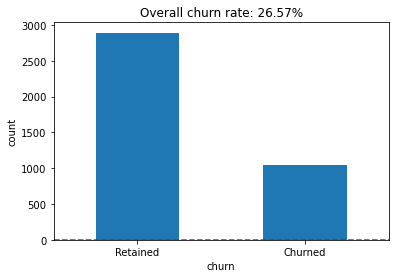

In [41]:
# overall churn rate
# x = train.has_churn
# y = train.has_churn.value_counts()
churn_rate = train.has_churn.mean()

tcr = train.has_churn.value_counts().sort_index().plot.bar()
tcr.axhline(churn_rate, color='r', linestyle='--')

plt.title(f'Overall churn rate: {churn_rate:.2%}')
plt.xlabel('churn')
plt.xticks(ticks=[1, 0], labels=['Churned', 'Retained'], rotation=0)
plt.ylabel('count')
plt.show()

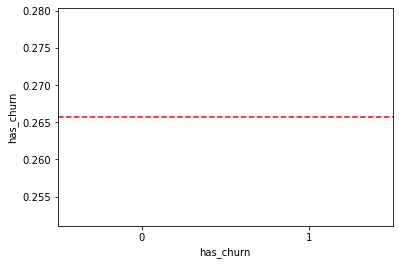

In [44]:
mean=train['has_churn'].mean()
tcr = sns.barplot(data = train, y= train.has_churn.value_counts(), x ='has_churn' )
tcr.axhline(mean, color='r', linestyle='--')